# The Prisoner's Dilemma

## Introduction

The Prisoner's Dilemma is one of the most famous examples in game theory, illustrating how rational individuals might not cooperate, even when it appears that cooperation would be in their mutual interest. It demonstrates the conflict between individual rationality and collective rationality.

## The Scenario

Two suspects are arrested by the police. The police have insufficient evidence for a conviction on the principal charge, but they have enough to convict both on a lesser charge. Simultaneously, the police offer each prisoner a bargain. Each prisoner is given the opportunity either to:

- **Cooperate (C)**: Remain silent and betray the other prisoner
- **Defect (D)**: Confess and betray the other prisoner

The possible outcomes depend on the choices of both prisoners:

1. **Both Cooperate**: Both prisoners betray each other, both get moderate sentences
2. **Both Defect**: Both prisoners remain silent, both get light sentences  
3. **One Cooperates, One Defects**: The cooperating prisoner goes free, the defecting prisoner gets a heavy sentence

## The Payoff Matrix

Let's define the payoffs in terms of years in prison (negative values represent the costs):


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import seaborn as sns

# Set up the plotting style with Rose Pine Dawn theme (light background)
plt.style.use('rose-pine-dawn')
sns.set_palette("husl")

# Define the payoff matrix
# Rows represent Player 1's choices, Columns represent Player 2's choices
# Payoffs are in the format (Player 1 payoff, Player 2 payoff)
# Negative values represent years in prison

payoff_matrix = np.array([
    [[-1, -1], [-10, 0]],    # Player 1 Cooperates
    [[0, -10], [-5, -5]]      # Player 1 Defects
])

# Labels for strategies
strategies = ['Cooperate', 'Defect']

print("Prisoner's Dilemma Payoff Matrix")
print("=" * 40)
print("Payoffs are in years in prison (negative = cost)")
print("Format: (Player 1 payoff, Player 2 payoff)")
print()

# Create a formatted table
df = pd.DataFrame(index=strategies, columns=strategies)
for i, strategy1 in enumerate(strategies):
    for j, strategy2 in enumerate(strategies):
        df.loc[strategy1, strategy2] = f"({payoff_matrix[i,j,0]:2d}, {payoff_matrix[i,j,1]:2d})"

print(df)


Prisoner's Dilemma Payoff Matrix
Payoffs are in years in prison (negative = cost)
Format: (Player 1 payoff, Player 2 payoff)

           Cooperate     Defect
Cooperate   (-1, -1)  (-10,  0)
Defect     ( 0, -10)   (-5, -5)


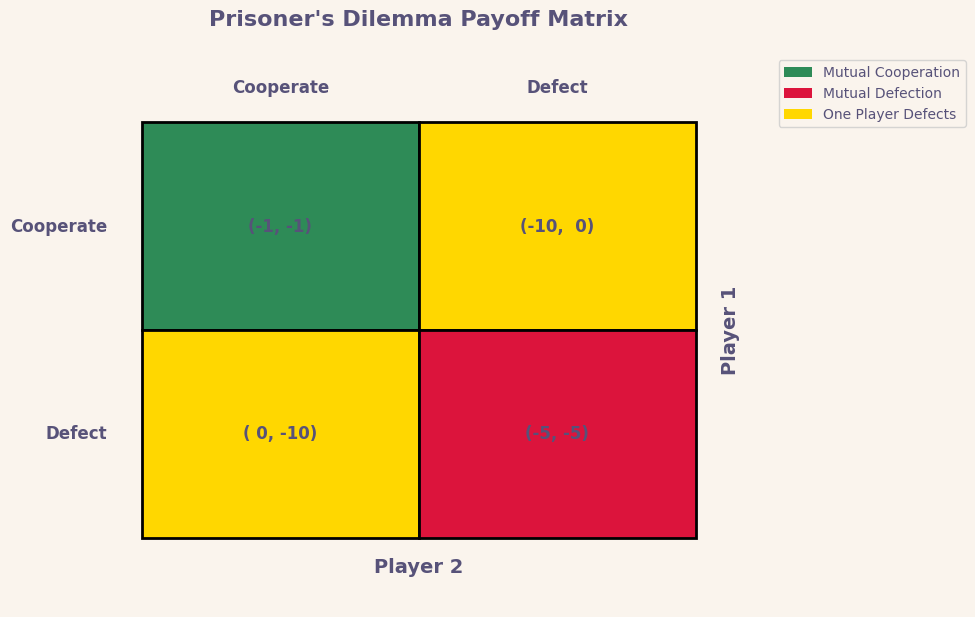

In [12]:
# Visualize the payoff matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create a heatmap-style visualization
cell_width = 0.4
cell_height = 0.3

# Colors for different outcomes
colors = {
    'mutual_cooperation': '#2E8B57',    # Sea Green (both cooperate)
    'mutual_defection': '#DC143C',      # Crimson (both defect)
    'one_defects': '#FFD700'            # Gold (exactly one player defects)
}

# Draw the payoff matrix cells
for i, strategy1 in enumerate(strategies):
    for j, strategy2 in enumerate(strategies):
        x = j * cell_width
        y = (1 - i) * cell_height
        
        # Determine cell color based on outcome
        if i == 0 and j == 0:  # Both cooperate
            color = colors['mutual_cooperation']
        elif i == 1 and j == 1:  # Both defect
            color = colors['mutual_defection']
        else:  # Exactly one player defects
            color = colors['one_defects']
        
        # Draw cell
        rect = Rectangle((x, y), cell_width, cell_height, 
                        facecolor=color, edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        
        # Add payoff text
        payoff_text = f"({payoff_matrix[i,j,0]:2d}, {payoff_matrix[i,j,1]:2d})"
        ax.text(x + cell_width/2, y + cell_height/2, payoff_text, 
                ha='center', va='center', fontsize=12, fontweight='bold')

# Set up the plot
ax.set_xlim(-0.1, 0.9)
ax.set_ylim(-0.1, 0.7)
ax.set_aspect('equal')

# Add labels - Player 2 below, Player 1 on the right side (centered)
ax.text(0.4, -0.05, 'Player 2', ha='center', fontsize=14, fontweight='bold')
ax.text(0.85, 0.3, 'Player 1', ha='center', va='center', fontsize=14, fontweight='bold', rotation=90)

# Add strategy labels
for i, strategy in enumerate(strategies):
    ax.text(-0.05, (1 - i) * cell_height + cell_height/2, strategy, 
            ha='right', va='center', fontsize=12, fontweight='bold')
    ax.text(i * cell_width + cell_width/2, 0.65, strategy, 
            ha='center', va='center', fontsize=12, fontweight='bold')

# Add legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['mutual_cooperation'], label='Mutual Cooperation'),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['mutual_defection'], label='Mutual Defection'),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['one_defects'], label='One Player Defects')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1))

ax.set_title("Prisoner's Dilemma Payoff Matrix", fontsize=16, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()


## Strategic Analysis

### Dominant Strategy

Let's analyze each player's best response to the other player's strategy:

**For Player 1:**
- If Player 2 Cooperates: Player 1 gets -1 by cooperating, 0 by defecting → **Defect is better**
- If Player 2 Defects: Player 1 gets -10 by cooperating, -5 by defecting → **Defect is better**

**For Player 2:**
- If Player 1 Cooperates: Player 2 gets -1 by cooperating, 0 by defecting → **Defect is better**
- If Player 1 Defects: Player 2 gets -10 by cooperating, -5 by defecting → **Defect is better**

**Conclusion:** Defecting is a **dominant strategy** for both players - it's always better regardless of what the other player does.

### Nash Equilibrium

A Nash Equilibrium is a set of strategies where no player can improve their outcome by unilaterally changing their strategy.

In the Prisoner's Dilemma:
- **Nash Equilibrium:** Both players defect (Defect, Defect)
- **Outcome:** Both get -5 years in prison
- **Why it's an equilibrium:** Neither player can improve by changing their strategy unilaterally

### The Dilemma

The paradox is that:
- **Individual rationality** leads both players to defect
- **Collective rationality** would have both players cooperate (both get -1 year)
- The Nash equilibrium (-5, -5) is **Pareto inefficient** compared to mutual cooperation (-1, -1)

This illustrates the fundamental tension between individual and collective rationality in strategic situations.


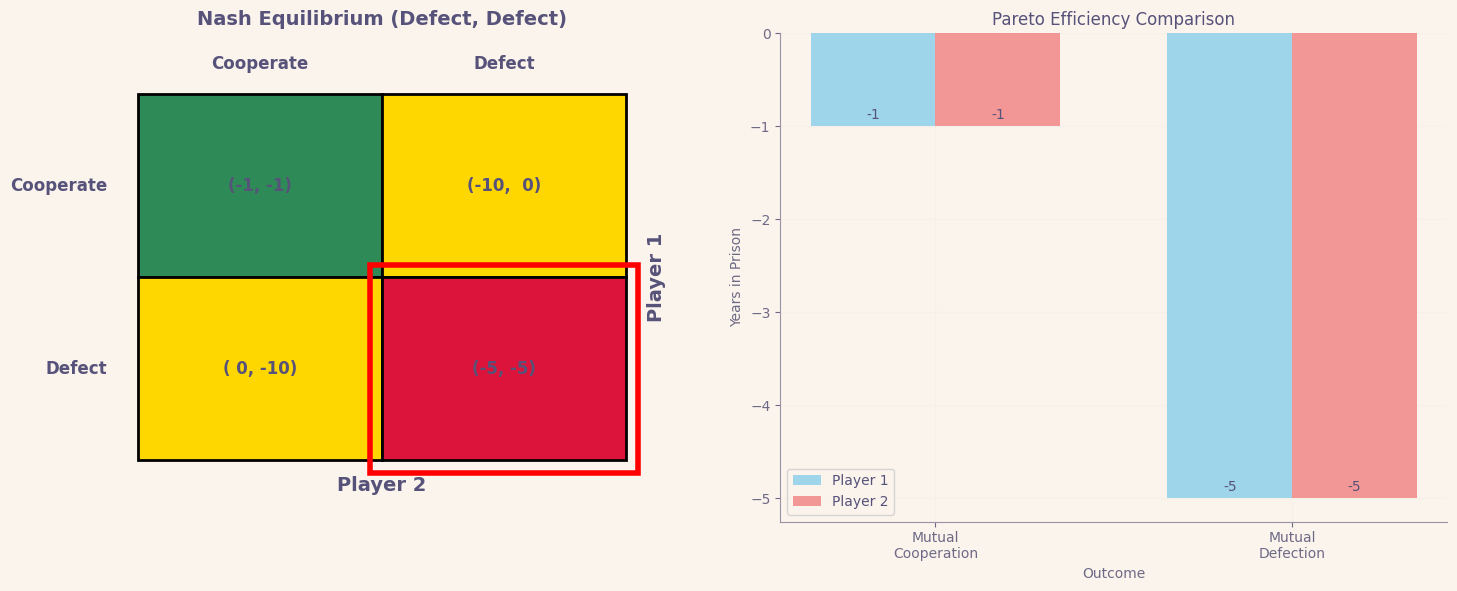

Key Insights:
• Nash Equilibrium: Both players defect → Both get -5 years
• Pareto Optimal: Both players cooperate → Both get -1 year
• The dilemma: Individual rationality leads to worse collective outcome


In [13]:
# Visualize the Nash Equilibrium and Pareto Efficiency
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Highlight Nash Equilibrium
ax1.set_xlim(-0.1, 0.9)
ax1.set_ylim(-0.1, 0.7)
ax1.set_aspect('equal')

cell_width = 0.4
cell_height = 0.3

# Draw all cells
for i, strategy1 in enumerate(strategies):
    for j, strategy2 in enumerate(strategies):
        x = j * cell_width
        y = (1 - i) * cell_height
        
        # Color based on outcome
        if i == 0 and j == 0:
            color = colors['mutual_cooperation']
        elif i == 1 and j == 1:
            color = colors['mutual_defection']
        else:
            color = colors['one_defects']
        
        rect = Rectangle((x, y), cell_width, cell_height, 
                        facecolor=color, edgecolor='black', linewidth=2)
        ax1.add_patch(rect)
        
        # Highlight Nash Equilibrium with thick border
        if i == 1 and j == 1:  # Both defect
            highlight_rect = Rectangle((x-0.02, y-0.02), cell_width+0.04, cell_height+0.04, 
                                     facecolor='none', edgecolor='red', linewidth=4)
            ax1.add_patch(highlight_rect)
        
        payoff_text = f"({payoff_matrix[i,j,0]:2d}, {payoff_matrix[i,j,1]:2d})"
        ax1.text(x + cell_width/2, y + cell_height/2, payoff_text, 
                ha='center', va='center', fontsize=12, fontweight='bold')

# Add labels and title - Player 2 below, Player 1 on the right side (centered)
ax1.text(0.4, -0.05, 'Player 2', ha='center', fontsize=14, fontweight='bold')
ax1.text(0.85, 0.3, 'Player 1', ha='center', va='center', fontsize=14, fontweight='bold', rotation=90)
ax1.set_title("Nash Equilibrium (Defect, Defect)", fontsize=14, fontweight='bold')

for i, strategy in enumerate(strategies):
    ax1.text(-0.05, (1 - i) * cell_height + cell_height/2, strategy, 
            ha='right', va='center', fontsize=12, fontweight='bold')
    ax1.text(i * cell_width + cell_width/2, 0.65, strategy, 
            ha='center', va='center', fontsize=12, fontweight='bold')

ax1.axis('off')

# Plot 2: Pareto Efficiency Comparison
outcomes = ['Mutual\nCooperation', 'Mutual\nDefection']
player1_payoffs = [-1, -5]
player2_payoffs = [-1, -5]

x = np.arange(len(outcomes))
width = 0.35

bars1 = ax2.bar(x - width/2, player1_payoffs, width, label='Player 1', color='skyblue', alpha=0.8)
bars2 = ax2.bar(x + width/2, player2_payoffs, width, label='Player 2', color='lightcoral', alpha=0.8)

ax2.set_xlabel('Outcome')
ax2.set_ylabel('Years in Prison')
ax2.set_title('Pareto Efficiency Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(outcomes)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax2.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Key Insights:")
print("• Nash Equilibrium: Both players defect → Both get -5 years")
print("• Pareto Optimal: Both players cooperate → Both get -1 year")
print("• The dilemma: Individual rationality leads to worse collective outcome")


## Interactive Simulation

Let's create a simple simulation where you can play the Prisoner's Dilemma against different strategies. This will help illustrate the concepts we've discussed.


In [14]:
import random

class PrisonersDilemmaGame:
    def __init__(self):
        self.payoff_matrix = payoff_matrix
        self.strategies = strategies
        
    def play_round(self, player1_strategy, player2_strategy):
        """Play a single round of the game"""
        i = strategies.index(player1_strategy)
        j = strategies.index(player2_strategy)
        
        player1_payoff = self.payoff_matrix[i, j, 0]
        player2_payoff = self.payoff_matrix[i, j, 1]
        
        return player1_payoff, player2_payoff
    
    def simulate_multiple_rounds(self, player1_strategy, player2_strategy, rounds=10):
        """Simulate multiple rounds and return cumulative payoffs"""
        player1_total = 0
        player2_total = 0
        results = []
        
        for round_num in range(rounds):
            p1_payoff, p2_payoff = self.play_round(player1_strategy, player2_strategy)
            player1_total += p1_payoff
            player2_total += p2_payoff
            results.append((p1_payoff, p2_payoff))
        
        return player1_total, player2_total, results

# Different AI strategies
def always_cooperate():
    return 'Cooperate'

def always_defect():
    return 'Defect'

def tit_for_tat(opponent_history):
    """Cooperate on first move, then copy opponent's last move"""
    if not opponent_history:
        return 'Cooperate'
    return opponent_history[-1]

def random_strategy():
    """Randomly choose between cooperate and defect"""
    return random.choice(['Cooperate', 'Defect'])

# Create game instance
game = PrisonersDilemmaGame()

print("Prisoner's Dilemma Simulation")
print("=" * 40)
print("Available strategies:")
print("1. Always Cooperate")
print("2. Always Defect") 
print("3. Tit-for-Tat")
print("4. Random")
print()

# Simulate different strategy combinations
strategy_combinations = [
    ('Always Cooperate', always_cooperate, 'Always Cooperate', always_cooperate),
    ('Always Defect', always_defect, 'Always Defect', always_defect),
    ('Always Cooperate', always_cooperate, 'Always Defect', always_defect),
    ('Tit-for-Tat', tit_for_tat, 'Tit-for-Tat', tit_for_tat),
]

print("Simulation Results (10 rounds each):")
print("-" * 50)

for name1, strategy1_func, name2, strategy2_func in strategy_combinations:
    player1_total = 0
    player2_total = 0
    
    # For tit-for-tat, we need to track history
    if 'Tit-for-Tat' in [name1, name2]:
        player1_history = []
        player2_history = []
        
        for round_num in range(10):
            if name1 == 'Tit-for-Tat':
                player1_move = strategy1_func(player2_history)
            else:
                player1_move = strategy1_func()
                
            if name2 == 'Tit-for-Tat':
                player2_move = strategy2_func(player1_history)
            else:
                player2_move = strategy2_func()
            
            p1_payoff, p2_payoff = game.play_round(player1_move, player2_move)
            player1_total += p1_payoff
            player2_total += p2_payoff
            
            player1_history.append(player1_move)
            player2_history.append(player2_move)
    else:
        # Simple strategies
        for round_num in range(10):
            player1_move = strategy1_func()
            player2_move = strategy2_func()
            p1_payoff, p2_payoff = game.play_round(player1_move, player2_move)
            player1_total += p1_payoff
            player2_total += p2_payoff
    
    print(f"{name1} vs {name2}:")
    print(f"  Player 1 total: {player1_total:3d} years")
    print(f"  Player 2 total: {player2_total:3d} years")
    print(f"  Combined total: {player1_total + player2_total:3d} years")
    print()


Prisoner's Dilemma Simulation
Available strategies:
1. Always Cooperate
2. Always Defect
3. Tit-for-Tat
4. Random

Simulation Results (10 rounds each):
--------------------------------------------------
Always Cooperate vs Always Cooperate:
  Player 1 total: -10 years
  Player 2 total: -10 years
  Combined total: -20 years

Always Defect vs Always Defect:
  Player 1 total: -50 years
  Player 2 total: -50 years
  Combined total: -100 years

Always Cooperate vs Always Defect:
  Player 1 total: -100 years
  Player 2 total:   0 years
  Combined total: -100 years

Tit-for-Tat vs Tit-for-Tat:
  Player 1 total: -10 years
  Player 2 total: -10 years
  Combined total: -20 years



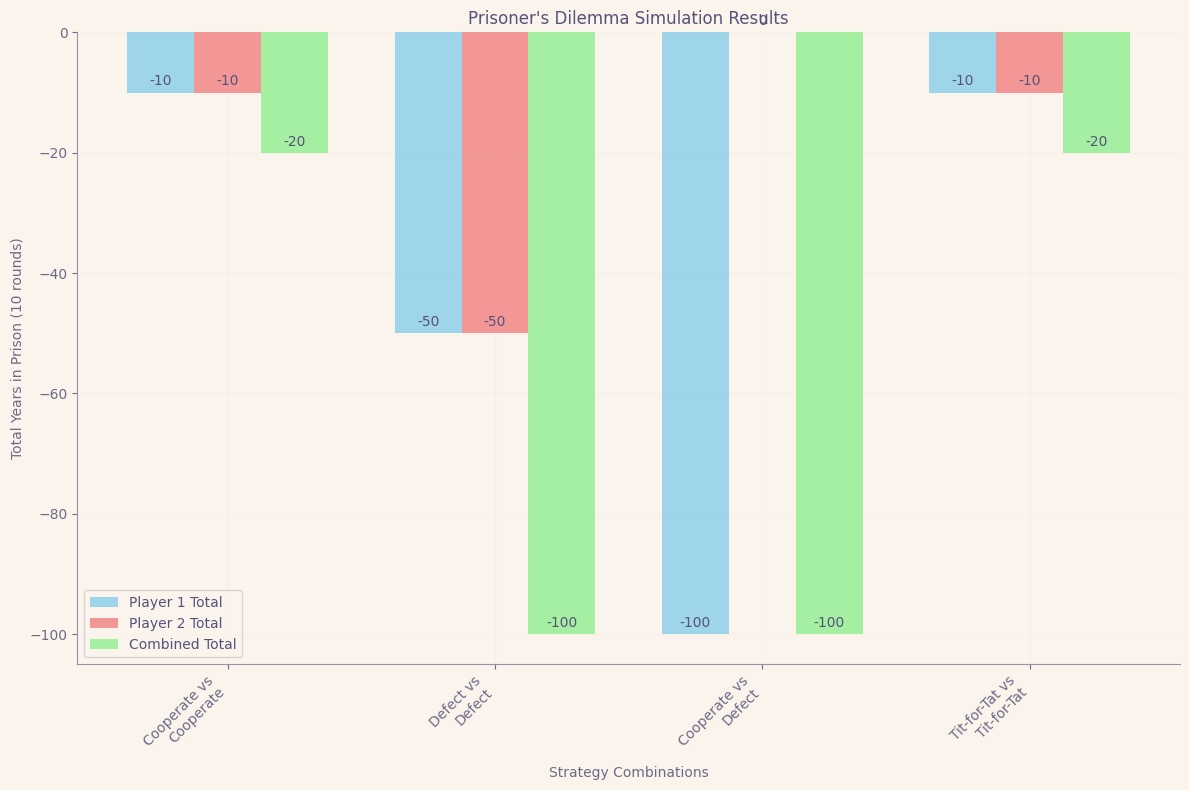

Key Observations from Simulation:
• Mutual cooperation yields the best combined outcome (-20 total years)
• Mutual defection yields the worst combined outcome (-100 total years)
• Tit-for-Tat can achieve cooperation when both players use it
• One-sided cooperation leads to exploitation


In [15]:
# Visualize the simulation results
fig, ax = plt.subplots(figsize=(12, 8))

# Data from simulations
strategy_pairs = ['Cooperate vs\nCooperate', 'Defect vs\nDefect', 'Cooperate vs\nDefect', 'Tit-for-Tat vs\nTit-for-Tat']
player1_scores = [-10, -50, -100, -10]  # Total over 10 rounds
player2_scores = [-10, -50, 0, -10]     # Total over 10 rounds
combined_scores = [-20, -100, -100, -20]

x = np.arange(len(strategy_pairs))
width = 0.25

bars1 = ax.bar(x - width, player1_scores, width, label='Player 1 Total', color='skyblue', alpha=0.8)
bars2 = ax.bar(x, player2_scores, width, label='Player 2 Total', color='lightcoral', alpha=0.8)
bars3 = ax.bar(x + width, combined_scores, width, label='Combined Total', color='lightgreen', alpha=0.8)

ax.set_xlabel('Strategy Combinations')
ax.set_ylabel('Total Years in Prison (10 rounds)')
ax.set_title('Prisoner\'s Dilemma Simulation Results')
ax.set_xticks(x)
ax.set_xticklabels(strategy_pairs, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Key Observations from Simulation:")
print("• Mutual cooperation yields the best combined outcome (-20 total years)")
print("• Mutual defection yields the worst combined outcome (-100 total years)")
print("• Tit-for-Tat can achieve cooperation when both players use it")
print("• One-sided cooperation leads to exploitation")


## Real-World Applications

The Prisoner's Dilemma has numerous applications in economics, politics, biology, and everyday life:

### Economics
- **Oligopoly pricing**: Firms choosing between competitive and cooperative pricing
- **Trade agreements**: Countries deciding whether to impose tariffs
- **Environmental regulation**: Companies choosing between clean and polluting production

### Politics
- **Arms races**: Nations deciding on military spending
- **International cooperation**: Climate change agreements
- **Electoral systems**: Voting strategies

### Biology
- **Evolutionary biology**: Cooperation vs. competition in species
- **Resource sharing**: Animals deciding whether to share food
- **Territorial behavior**: Defending vs. sharing territory

### Everyday Life
- **Roommate situations**: Cleaning shared spaces
- **Traffic**: Following vs. breaking traffic rules
- **Workplace**: Individual vs. team productivity

## Solutions to the Prisoner's Dilemma

Several mechanisms can help overcome the dilemma:

1. **Repeated Games**: When players interact multiple times, cooperation becomes more likely
2. **Reputation**: Players care about their reputation for future interactions
3. **Institutions**: External enforcement mechanisms (laws, contracts)
4. **Communication**: Allowing players to discuss strategies beforehand
5. **Evolution of Cooperation**: Strategies that promote cooperation can evolve over time

## Conclusion

The Prisoner's Dilemma illustrates a fundamental challenge in strategic decision-making: the tension between individual and collective rationality. While the Nash equilibrium leads to mutual defection, understanding this dilemma helps us design better institutions, policies, and strategies that promote cooperation and mutual benefit.

The key insight is that cooperation often requires mechanisms beyond pure individual rationality - whether through repeated interaction, reputation effects, or institutional design.
